## Projet: Etudes des rechargements des véhicules électriques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#### Importation et Visualisation de nos données

In [2]:
df=pd.read_csv('ev_charging_patterns.csv')
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [12]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [13]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [14]:
column_names = df.columns

### Partie Prétraitement et  Analyse des données

In [15]:
# Séparation des colonnes catégorielles et numériques
categorical_columns = ['Vehicle Model', 'Charging Station Location', 'Day of Week', 'Charger Type', 'User Type']
numeric_columns = ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 
                   'Charging Rate (kW)', 'Charging Cost (USD)', 'Distance Driven (since last charge) (km)', 
                   'Temperature (°C)', 'Vehicle Age (years)', 'State of Charge (Start %)', 'State of Charge (End %)']


In [16]:
# Suppression des colonnes inutiles avant tout traitement
df = df.drop(columns=['User ID', 'Charging Station ID', 'Charging Start Time', 'Charging End Time'])

In [8]:
# Sélectionner uniquement les colonnes numériques
cols_numeric = df.select_dtypes(include=['float64', 'int64'])

### Voyons un peu les boxplots des variables numériques

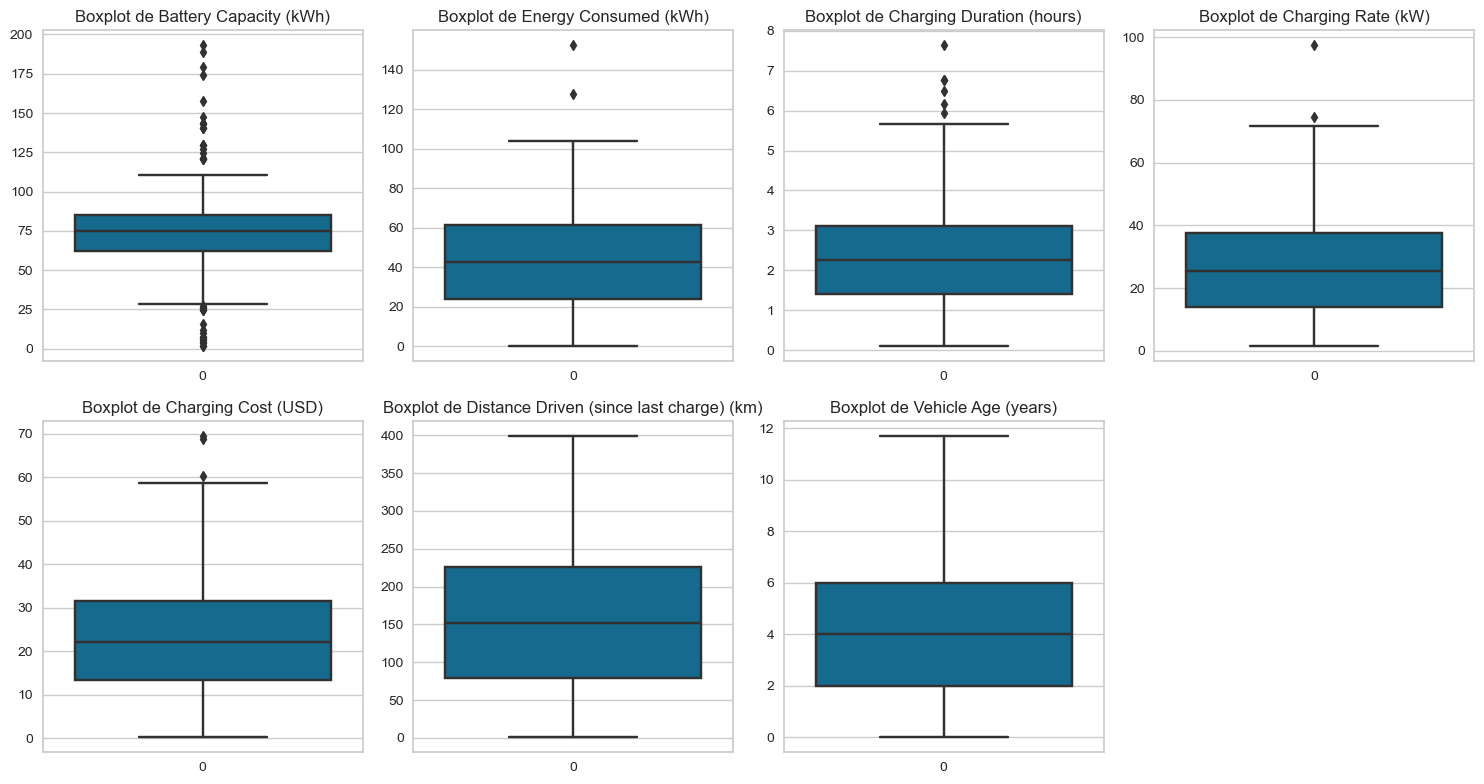

In [17]:


# Liste des colonnes pour lesquelles on veut créer les boxplots
cols = [
    'Battery Capacity (kWh)', 
    'Energy Consumed (kWh)', 
    'Charging Duration (hours)', 
    'Charging Rate (kW)', 
    'Charging Cost (USD)', 
    'Distance Driven (since last charge) (km)',
    'Vehicle Age (years)'
]

# Définir la taille de la figure pour afficher plusieurs plots
plt.figure(figsize=(15, 8))

# Boucle sur chaque colonne dans la liste des colonnes à visualiser
for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)  # Créer un subplot avec 2 lignes et 3 colonnes
    sns.boxplot(data=df[col])  # Créer le boxplot pour la colonne
    plt.title(f'Boxplot de {col}')  # Ajouter un titre pour chaque boxplot

# Ajuster l'espacement entre les plots
plt.tight_layout()
plt.show()


#### D'après les boxplots nous constatons les colonnes qui contiennent des valeur aberrantes (' 'Battery Capacity (kWh)', 
##### 'Energy Consumed (kWh)', 
#####  'Charging Duration (hours)', 
##### - 'Charging Rate (kW)', 
##### - 'Charging Cost (USD)',
##### - 'Battery Capacity (kWh)'
 


#### Traitons ces valeurs abérantes

In [18]:
# Fonction pour détecter les outliers en utilisant l'IQR (Interquartile Range)
def detect_and_replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculer la moyenne de la colonne
    mean_value = data[column].mean()

    # Remplacer les outliers par la moyenne
    data[column] = data[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# Liste des colonnes où tu veux détecter et remplacer les outliers
cols = [
    'Battery Capacity (kWh)', 
    'Energy Consumed (kWh)', 
    'Charging Duration (hours)', 
    'Charging Rate (kW)', 
    'Charging Cost (USD)', 
]

# Appliquer la détection et remplacement des outliers pour chaque colonne
for col in cols:
    detect_and_replace_outliers_iqr(df, col)

# Afficher le DataFrame pour vérifier que les outliers ont bien été remplacés
print(df.head())



  Vehicle Model  Battery Capacity (kWh) Charging Station Location  \
0        BMW i3              108.463007                   Houston   
1  Hyundai Kona              100.000000             San Francisco   
2    Chevy Bolt               75.000000             San Francisco   
3  Hyundai Kona               50.000000                   Houston   
4  Hyundai Kona               50.000000               Los Angeles   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653           27.513593   
3              79.457824                   1.266431           32.882870   
4              19.629104                   2.019765           10.215712   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0            13.087717     Evening     Tuesday           

In [19]:
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,BMW i3,108.463007,Houston,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,Hyundai Kona,100.000000,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,Chevy Bolt,75.000000,San Francisco,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,Hyundai Kona,50.000000,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,Hyundai Kona,50.000000,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


### Verifions de nouveaux les outliers 

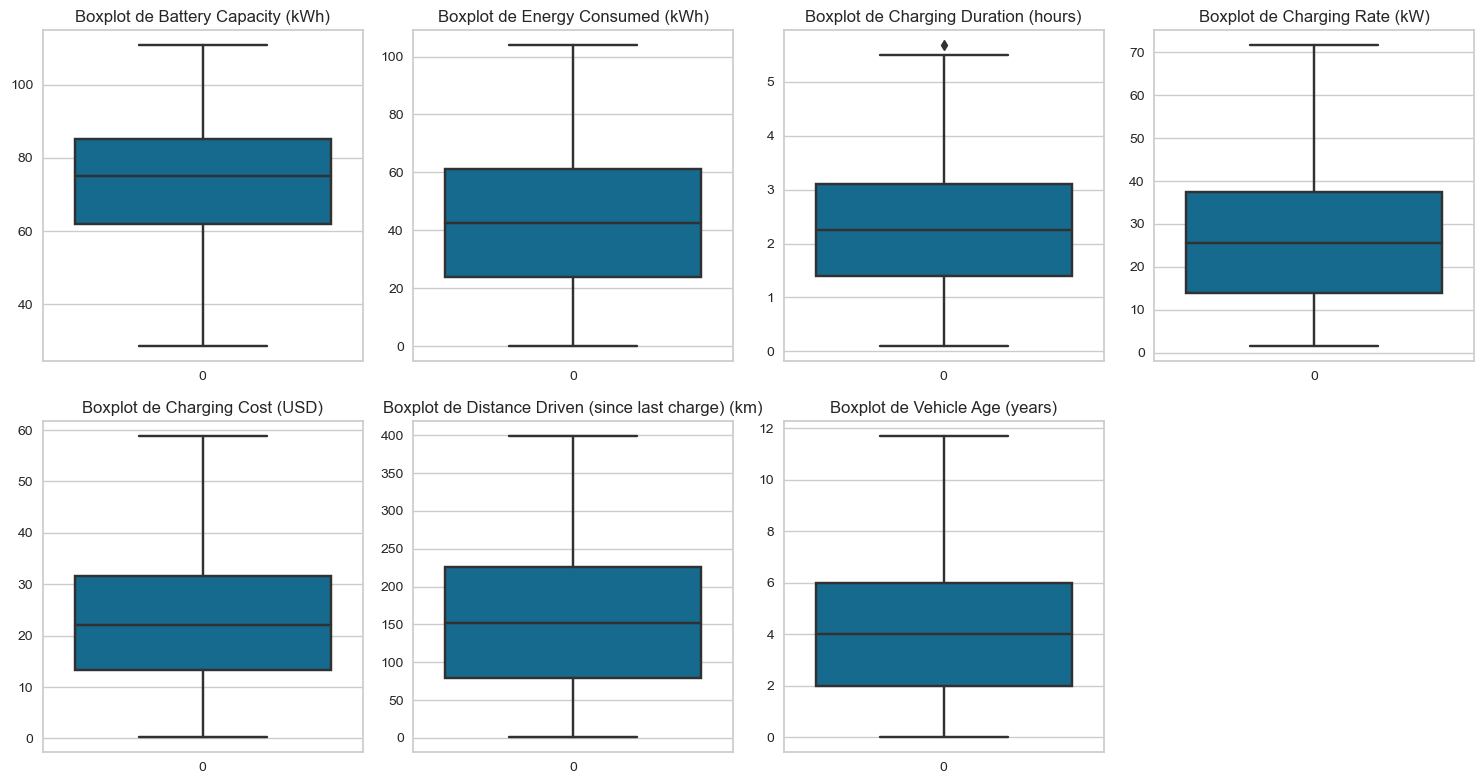

In [20]:

# Liste des colonnes pour lesquelles on veut créer les boxplots
cols = [
    'Battery Capacity (kWh)', 
    'Energy Consumed (kWh)', 
    'Charging Duration (hours)', 
    'Charging Rate (kW)', 
    'Charging Cost (USD)', 
    'Distance Driven (since last charge) (km)',
    'Vehicle Age (years)'
]

# Définir la taille de la figure pour afficher plusieurs plots
plt.figure(figsize=(15, 8))

# Boucle sur chaque colonne dans la liste des colonnes à visualiser
for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)  # Créer un subplot avec 2 lignes et 3 colonnes
    sns.boxplot(data=df[col])  # Créer le boxplot pour la colonne
    plt.title(f'Boxplot de {col}')  # Ajouter un titre pour chaque boxplot

# Ajuster l'espacement entre les plots
plt.tight_layout()
plt.show()


### Parfait

#### Maintenant passons au prétraitement des valeurs manquantes et la normalisation des données

In [21]:
# Séparation des colonnes catégorielles et numériques
categorical_columns = ['Vehicle Model', 'Charging Station Location', 'Day of Week', 'Charger Type', 'User Type']
numeric_columns = ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 
                   'Charging Rate (kW)', 'Charging Cost (USD)', 'Distance Driven (since last charge) (km)', 
                   'Temperature (°C)', 'Vehicle Age (years)', 'State of Charge (Start %)', 'State of Charge (End %)']

In [22]:
# Création d'un transformateur pour les variables numériques (imputation + standardisation)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation des valeurs manquantes par la moyenne
    ('scaler', StandardScaler())                 # Standardisation
])

In [23]:
# Création d'un transformateur pour les variables catégorielles (encodage + imputation si nécessaire)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Pour les valeurs manquantes, on utilise la valeur la plus fréquente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-Hot Encoding
])

In [24]:
# Application des transformations via ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [25]:
# Création du pipeline global de prétraitement
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [26]:
# Application du pipeline sur les données
df_preprocessed = preprocessing_pipeline.fit_transform(df)

# Vérification du résultat
print(df_preprocessed.shape)  # Affiche les dimensions des données prétraitées

(1320, 33)


In [27]:
df_preprocessed

array([[ 1.95265193,  0.84772648, -1.62851194, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4680119 , -1.40235617,  0.86827457, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03636946, -1.0865366 ,  0.19946383, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.4680119 , -1.09741064,  0.99935536, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60902644, -1.33644525,  0.4959356 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.00972326,  0.98449159,  1.46472304, ...,  0.        ,
         1.        ,  0.        ]])

####  Sauvegarde du tableau numpy

In [49]:

np.save('data.npy', df_preprocessed)


### Analyse en Composantes Principales

In [28]:
# Aplication de l'ACP (2 composante)
pca=PCA(n_components=2)
res_pca=pca.fit_transform(df_preprocessed)
type(res_pca)

numpy.ndarray

In [29]:
res_pca

array([[-1.25837142, -1.19335153],
       [-1.33398822, -0.88102229],
       [ 0.23440861, -1.18976602],
       ...,
       [ 0.49835174, -1.27389826],
       [ 1.17986941, -1.50823018],
       [-0.80880038,  1.32919763]])

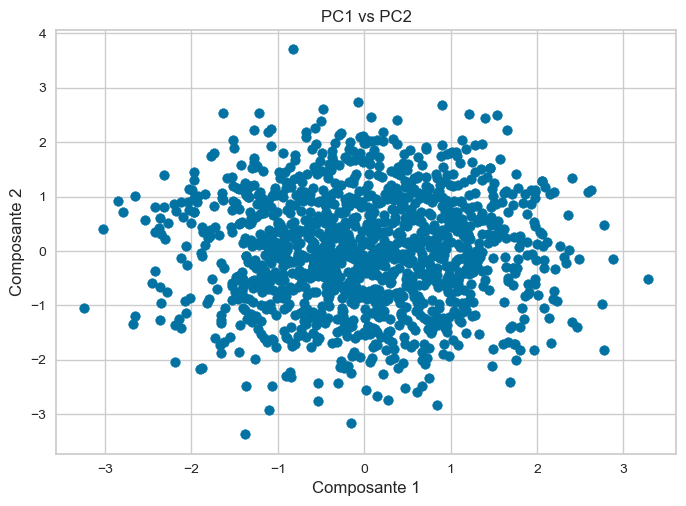

In [30]:
# Visualisation des composantes principales

plt.scatter(res_pca[:,0], res_pca[:,1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()

In [31]:
# Coefficient de correlation de pearson obtenu après ACP
pearsonr(res_pca[:, 0], res_pca[:, 1])


PearsonRResult(statistic=6.429318882839041e-17, pvalue=0.9999999999995767)

### ACP non linéaire

In [32]:
# Chargement de données d'entrainement recement sauvegarder
data=np.load('data.npy')

In [33]:
# KPCA avec noyau ''rbf''
kpca=KernelPCA(n_components=2, kernel='rbf')
res_kpca_rbf=kpca.fit_transform(data)
type(res_kpca_rbf)

numpy.ndarray

In [34]:
res_kpca_rbf

array([[-0.08488252,  0.24486377],
       [-0.13183879,  0.28720037],
       [ 0.11999467,  0.2254509 ],
       ...,
       [ 0.15279134,  0.19624523],
       [ 0.25762591,  0.17179464],
       [-0.24155501, -0.14434209]])

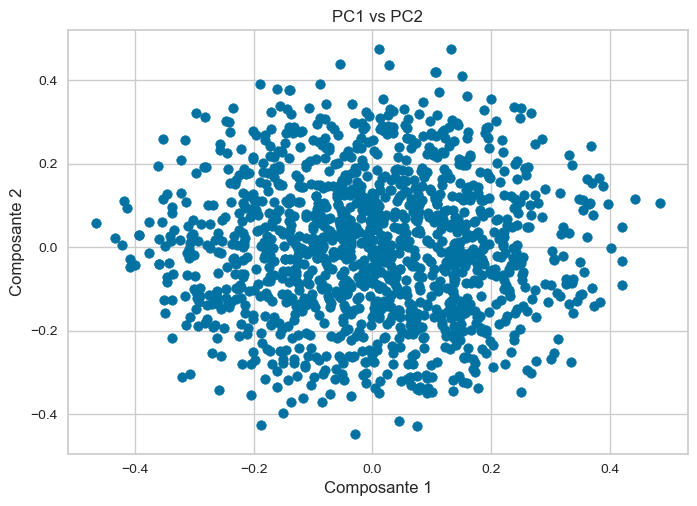

In [35]:
# Visualisation des composantes principales

plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()

In [36]:
# Coefficient de correlation de pearson obtenu après ACP
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])

PearsonRResult(statistic=7.958043946043603e-17, pvalue=0.9999999999995767)

In [37]:
#Comparaison des coefficient de pearson
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])[0]<pearsonr(res_pca[:, 0], res_pca[:, 1])[0]

False

### Selon la comparaison on peut dire que les deux composants sont pas fortement linéaire 

In [38]:
# Ajout des composantes principales comme colonnes de df
df['x_kpc_rbf']=res_kpca_rbf[:,0]
df['y_kpc_rbf']=res_kpca_rbf[:,1]
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,x_kpc_rbf,y_kpc_rbf
0,BMW i3,108.463007,Houston,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,-0.084883,0.244864
1,Hyundai Kona,100.000000,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,-0.131839,0.287200
2,Chevy Bolt,75.000000,San Francisco,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,0.119995,0.225451
3,Hyundai Kona,50.000000,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,0.106192,-0.149172
4,Hyundai Kona,50.000000,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,-0.075216,0.040006


### Le Clustering K-Means avec la méthode du coude

In [39]:

cluster_model=KMeans(n_clusters=4)
cluster_model.fit(res_kpca_rbf)
clusters=cluster_model.predict(res_kpca_rbf)

c:\Users\MHD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
# Affichage des clusters
clusters

array([3, 3, 3, ..., 1, 1, 2])

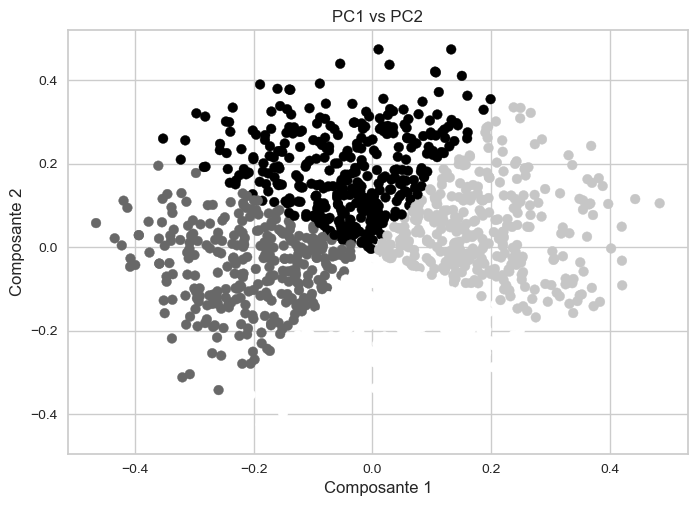

In [41]:
#Visualisons les clusters

plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1],c=clusters)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()

C:\Users\MHD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MHD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MHD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MHD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MHD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans

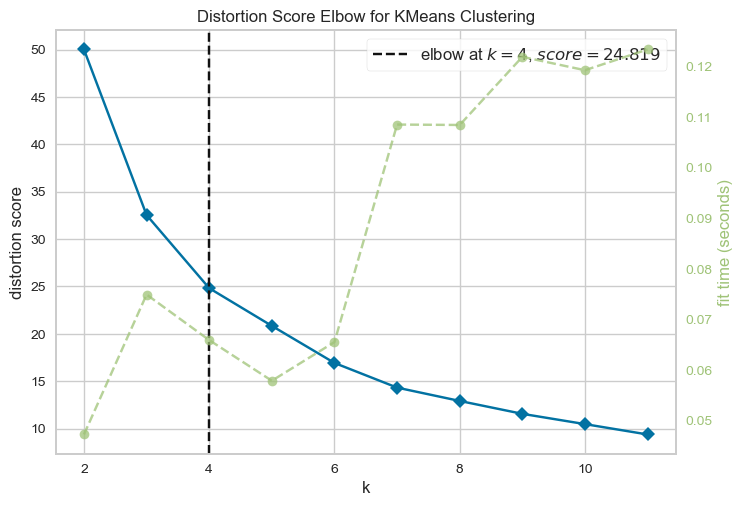

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
# Methode du coude  pour savoir la meilleure K
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(res_kpca_rbf)
visualizer.show()

### Effectivement nous avons choisis la meilleure K

#### Ajout des clusters aux données et sauvegardons au format CSV

In [66]:

df['cluster_kpca_rbf']=clusters
df.to_csv('data_with_clusters.csv')

### Passons mainteneant à l'analyse des résultats des segmentations

In [42]:
# Chargement des données 
df=pd.read_csv('data_with_clusters.csv', index_col=0)
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,x_kpc_rbf,y_kpc_rbf,cluster_kpca_rbf
0,BMW i3,108.463007,Houston,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,-0.084883,0.244864,1
1,Hyundai Kona,100.000000,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,-0.131839,0.287200,1
2,Chevy Bolt,75.000000,San Francisco,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,0.119995,0.225451,1
3,Hyundai Kona,50.000000,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,0.106192,-0.149172,0
4,Hyundai Kona,50.000000,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,-0.075216,0.040006,1


In [43]:
df['cluster_kpca_rbf'].unique()

array([1, 0, 3, 2], dtype=int64)

In [44]:
#Stockage des noms des colonnes dans une liste
features=df.columns.tolist()
features

['Vehicle Model',
 'Battery Capacity (kWh)',
 'Charging Station Location',
 'Energy Consumed (kWh)',
 'Charging Duration (hours)',
 'Charging Rate (kW)',
 'Charging Cost (USD)',
 'Time of Day',
 'Day of Week',
 'State of Charge (Start %)',
 'State of Charge (End %)',
 'Distance Driven (since last charge) (km)',
 'Temperature (°C)',
 'Vehicle Age (years)',
 'Charger Type',
 'User Type',
 'x_kpc_rbf',
 'y_kpc_rbf',
 'cluster_kpca_rbf']

In [45]:
# Centroides
df.groupby('cluster_kpca_rbf')[features].mean()

C:\Users\MHD\AppData\Local\Temp\ipykernel_6728\842859591.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster_kpca_rbf')[features].mean()


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),x_kpc_rbf,y_kpc_rbf,cluster_kpca_rbf
cluster_kpca_rbf,,,,,,,,,,,,,
0,68.749831,50.044226,2.208894,18.590599,23.093569,63.602515,76.230163,117.970313,20.575731,4.724636,0.053227,-0.182648,0.0
1,81.491659,33.921580,2.241594,33.249381,21.721490,35.915646,74.878430,187.421103,10.012440,2.676494,-0.049202,0.177806,1.0
2,76.217298,56.688534,2.800138,21.109402,16.523116,41.615663,79.432770,155.210441,6.396223,4.082395,-0.203216,-0.060303,2.0
3,70.436917,30.186941,1.774753,30.089289,28.285718,55.941114,70.155798,152.142670,24.082594,3.041670,0.194077,0.050058,3.0


In [46]:
df.groupby(['cluster_kpca_rbf', 'Vehicle Model'])[features].mean()

C:\Users\MHD\AppData\Local\Temp\ipykernel_6728\1100084770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['cluster_kpca_rbf', 'Vehicle Model'])[features].mean()


Battery Capacity (kWh)  Energy Consumed (kWh)  \
cluster_kpca_rbf Vehicle Model                                                  
0                BMW i3                      68.458696              45.513166   
                 Chevy Bolt                  69.792936              47.834511   
                 Hyundai Kona                67.760083              53.570753   
                 Nissan Leaf                 70.372992              50.520472   
                 Tesla Model 3               67.799101              52.340049   
1                BMW i3                      82.012425              32.464502   
                 Chevy Bolt                  78.333101              33.078503   
                 Hyundai Kona                83.488320              32.924828   
                 Nissan Leaf                 79.385008              36.368584   
                 Tesla Model 3               84.079335              35.304170   
2                BMW i3                      77.150638              56.816691   
                 Chevy Bolt                  76.456285              54.881648   
                 Hyundai Kona                79.607789              58.181622   
                 Nissan Leaf                 76.066738              57.379948   
                 Tesla Model 3               73.010982              56.681996   
3                BMW i3                      76.202591              29.968268   
                 Chevy Bolt                  70.773037              26.005453   
                 Hyundai Kona                69.017983              33.201573   
                 Nissan Leaf                 68.339645              31.692761   
                 Tesla Model 3               70.055906              28.278443   

                                Charging Duration (hours)  Charging Rate (kW)  \
cluster_kpca_rbf Vehicle Model                                                  
0                BMW i3                          2.204785           19.817404   
                 Chevy Bolt                      2.422006           16.924885   
                 Hyundai Kona                    2.274309           18.368081   
                 Nissan Leaf                     1.972307           20.261888   
                 Tesla Model 3                   2.173024           17.809388   
1                BMW i3                          2.103679           34.575073   
                 Chevy Bolt                      2.351655           32.476466   
                 Hyundai Kona                    2.242433           32.149131   
                 Nissan Leaf                     2.231303           33.182660   
                 Tesla Model 3                   2.266366           33.939819   
2                BMW i3                          2.565353           23.056276   
                 Chevy Bolt                      2.910314           19.101281   
                 Hyundai Kona                    3.010458           22.263897   
                 Nissan Leaf                     2.755299           20.074453   
                 Tesla Model 3                   2.837363           21.150930   
3                BMW i3                          1.654899           28.979178   
                 Chevy Bolt                      2.026247           29.318793   
                 Hyundai Kona                    1.840078           31.583093   
                 Nissan Leaf                     1.717882           30.918191   
                 Tesla Model 3                   1.642674           28.751405   

                                Charging Cost (USD)  \
cluster_kpca_rbf Vehicle Model                        
0                BMW i3                   23.124396   
                 Chevy Bolt               24.094010   
                 Hyundai Kona             21.934686   
                 Nissan Leaf              24.305901   
                 Tesla Model 3            22.381255   
1                BMW i3                   18.496762   
                 Chevy Bol

In [47]:

df.groupby(['cluster_kpca_rbf', 'Vehicle Model', 'Charging Station Location'])[features].mean()



C:\Users\MHD\AppData\Local\Temp\ipykernel_6728\3001975039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['cluster_kpca_rbf', 'Vehicle Model', 'Charging Station Location'])[features].mean()


Battery Capacity (kWh)  \
cluster_kpca_rbf Vehicle Model Charging Station Location                           
0                BMW i3        Chicago                                 73.358924   
                               Houston                                 63.798044   
                               Los Angeles                             64.901706   
                               New York                                77.941836   
                               San Francisco                           68.468836   
...                                                                          ...   
3                Tesla Model 3 Chicago                                 63.669787   
                               Houston                                 66.129742   
                               Los Angeles                             71.752152   
                               New York                                75.864549   
                               San Francisco                           74.400000   

                                                          Energy Consumed (kWh)  \
cluster_kpca_rbf Vehicle Model Charging Station Location                          
0                BMW i3        Chicago                                44.315256   
                               Houston                                44.951667   
                               Los Angeles                            44.165694   
                               New York                               53.211974   
                               San Francisco                          44.912015   
...                                                                         ...   
3                Tesla Model 3 Chicago                                31.243948   
                               Houston                                24.897528   
                               Los Angeles                            25.479788   
                               New York                               34.309688   
                               San Francisco                          25.939421   

                                                          Charging Duration (hours)  \
cluster_kpca_rbf Vehicle Model Charging Station Location                              
0                BMW i3        Chicago                                     2.312671   
                               Houston                                     2.230921   
                               Los Angeles                                 1.994736   
                               New York                                    2.089623   
                               San Francisco                               2.408266   
...                                                                             ...   
3                Tesla Model 3 Chicago                                     1.752820   
                               Houston                                     1.400259   
                               Los Angeles                                 1.567537   
                               New York                                    1.524148   
                               San Francisco                               1.969632   

                                                          Charging Rate (kW)  \
cluster_kpca_rbf Vehicle Model Charging Station Location                       
0                BMW i3        Chicago                             20.255597   
                               Houston                             22.117890   
                               Los Angeles                         18.106484   
                               New York                            19.193231   
                               San Francisco                       18.740395   
...                                                                      ...   
3                Tesla Model 3 Chicago                             29.826661   
                               Ho

In [48]:
cluster_stats=df.groupby(['cluster_kpca_rbf'])[features].mean()

C:\Users\MHD\AppData\Local\Temp\ipykernel_6728\2792296095.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats=df.groupby(['cluster_kpca_rbf'])[features].mean()


In [49]:
for i in range(len(cluster_stats)):
    print(f"Cluster {i}:")
    print(f"- Distance moyenne parcourue depuis la dernière charge: {cluster_stats['Distance Driven (since last charge) (km)'][i]:.2f} kWh")
    print(f"- Age moyen de la vehicule: {cluster_stats['Vehicle Age (years)'][i]:.2f} years")
    print(f"- Energie moyenne consomée: {cluster_stats['Energy Consumed (kWh)'][i]:.2f} kWh")
    print(f"- Capacité moyenne de batterie: {cluster_stats['Battery Capacity (kWh)'][i]:.2f} kWh")
    print(f"- Durée moyenne de charge: {cluster_stats['Charging Duration (hours)'][i]:.2f} heures")
    print(f"- Coût moyen de la charge: {cluster_stats['Charging Cost (USD)'][i]:.2f} USD")
    print()

Cluster 0:
- Distance moyenne parcourue depuis la dernière charge: 117.97 kWh
- Age moyen de la vehicule: 4.72 years
- Energie moyenne consomée: 50.04 kWh
- Capacité moyenne de batterie: 68.75 kWh
- Durée moyenne de charge: 2.21 heures
- Coût moyen de la charge: 23.09 USD

Cluster 1:
- Distance moyenne parcourue depuis la dernière charge: 187.42 kWh
- Age moyen de la vehicule: 2.68 years
- Energie moyenne consomée: 33.92 kWh
- Capacité moyenne de batterie: 81.49 kWh
- Durée moyenne de charge: 2.24 heures
- Coût moyen de la charge: 21.72 USD

Cluster 2:
- Distance moyenne parcourue depuis la dernière charge: 155.21 kWh
- Age moyen de la vehicule: 4.08 years
- Energie moyenne consomée: 56.69 kWh
- Capacité moyenne de batterie: 76.22 kWh
- Durée moyenne de charge: 2.80 heures
- Coût moyen de la charge: 16.52 USD

Cluster 3:
- Distance moyenne parcourue depuis la dernière charge: 152.14 kWh
- Age moyen de la vehicule: 3.04 years
- Energie moyenne consomée: 30.19 kWh
- Capacité moyenne de b

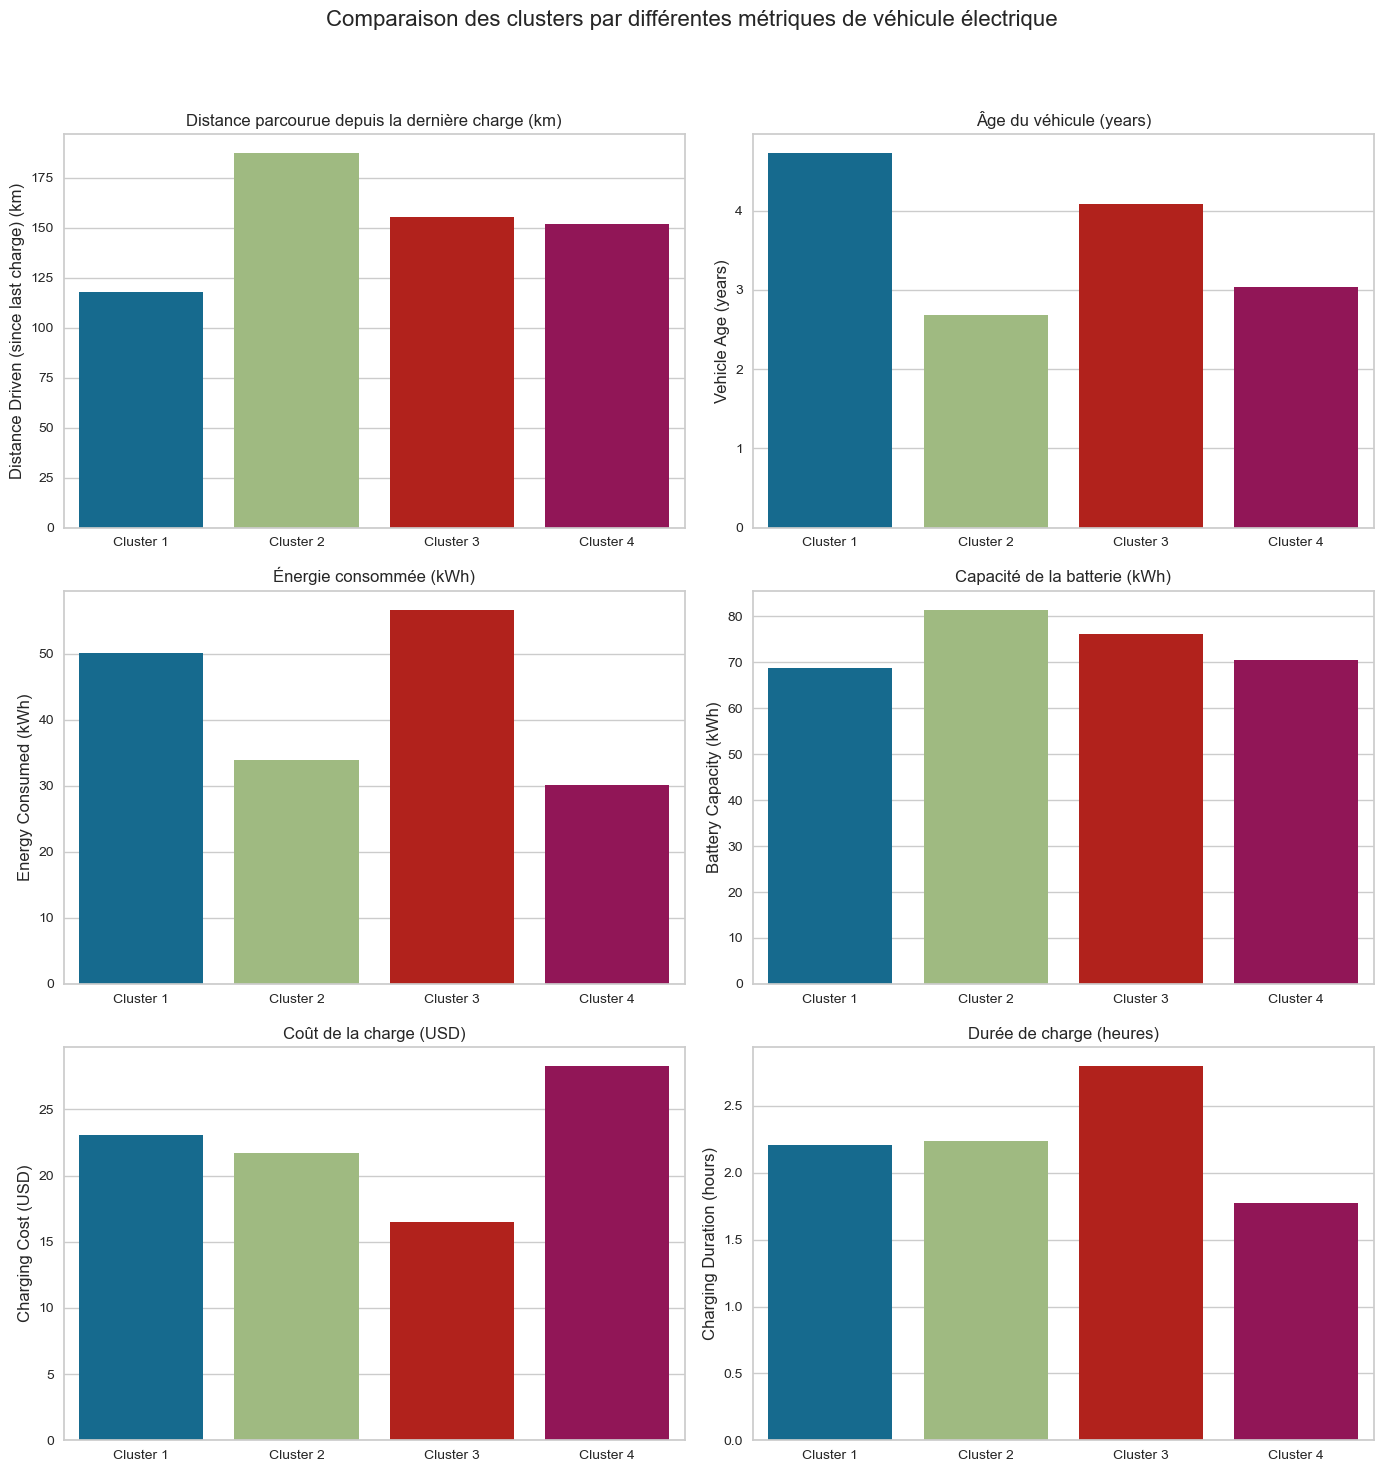

In [52]:
# Créer la figure avec 3 lignes et 2 colonnes pour accueillir 6 sous-graphes
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Ajouter un titre général pour l'ensemble des sous-graphes
fig.suptitle('Comparaison des clusters par différentes métriques de véhicule électrique', fontsize=16)

# Premier graphique : Distance Driven (since last charge) (km)
sns.barplot(x=categories, y=distance_driven, ax=axes[0, 0])
axes[0, 0].set_title('Distance parcourue depuis la dernière charge (km)')

# Deuxième graphique : Vehicle Age (years)
sns.barplot(x=categories, y=vehicle_age, ax=axes[0, 1])
axes[0, 1].set_title('Âge du véhicule (years)')

# Troisième graphique : Energy Consumed (kWh)
sns.barplot(x=categories, y=energy_consumed, ax=axes[1, 0])
axes[1, 0].set_title('Énergie consommée (kWh)')

# Quatrième graphique : Battery Capacity (kWh)
sns.barplot(x=categories, y=battery_capacity, ax=axes[1, 1])
axes[1, 1].set_title('Capacité de la batterie (kWh)')

# Cinquième graphique : Charging Cost (USD)
sns.barplot(x=categories, y=charging_cost, ax=axes[2, 0])
axes[2, 0].set_title('Coût de la charge (USD)')

# Sixième graphique : Charging Duration (hours)
sns.barplot(x=categories, y=charging_duration, ax=axes[2, 1])
axes[2, 1].set_title('Durée de charge (heures)')

# Ajuster l'espacement entre les sous-graphes pour ne pas que le titre global chevauche les sous-graphes
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Afficher le graphique
plt.show()


###  Visualisons la distribution de la capacité de la batterie dans chaque cluster

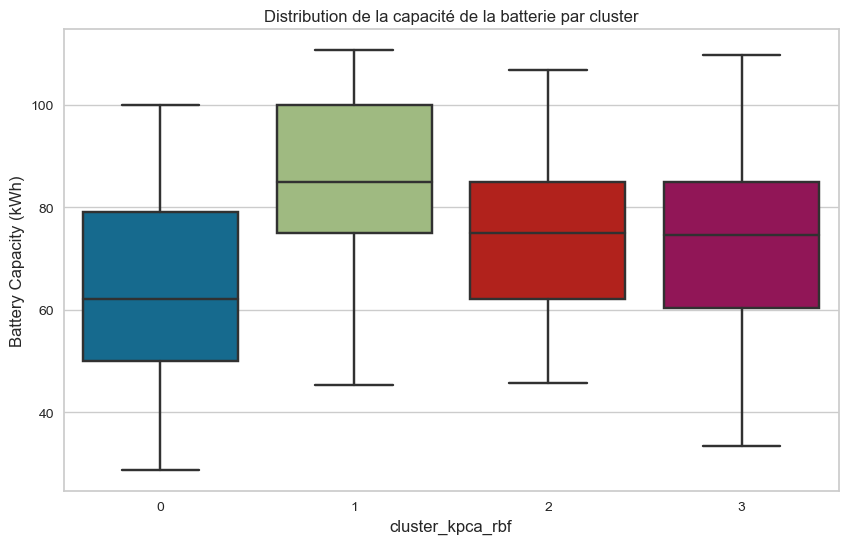

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_kpca_rbf', y='Battery Capacity (kWh)', data=df)
plt.title('Distribution de la capacité de la batterie par cluster')
plt.show()
